<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/ML_Health_and_Medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install missingpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
import os, sys, warnings, itertools
import import_ipynb
import tarfile
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from six.moves import urllib

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.compose import (ColumnTransformer, make_column_transformer)
from sklearn.pipeline import (Pipeline, make_pipeline)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)
from sklearn.model_selection import GridSearchCV

In [ ]:
%matplotlib inline

In [ ]:
module_path = os.path.abspath(os.path.join("./"))

In [ ]:
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
from MachineLearningUtils import *

importing Jupyter notebook from MachineLearningUtils.ipynb


In [ ]:
curr_dir = os.getcwd()
assert curr_dir == "/Users/ariahosseini/Desktop/Notebooks"

In [ ]:
data_dir = "./"
csv_path = os.path.join(data_dir, "support2.csv")
data = pd.read_csv(csv_path)

In [ ]:
reduce_memory_usage(df=data, category=True)

Memory usage of dataframe is 3.334476 MB!
Memory usage after optimization is 0.774442 MB!
Decreased by 76.8%


In [ ]:
summarize_columns(data)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,row_id,int16,0,0.0,9105,1,2,3
1,age,float16,0,0.0,1778,62.84375,60.34375,52.75
2,death,int8,0,0.0,2,0,1,1
3,sex,category,0,0.0,2,male,female,female
4,hospdead,int8,0,0.0,2,0,1,0
5,slos,int16,0,0.0,167,5,4,17
6,d_time,int16,0,0.0,1724,2029,4,47
7,dzgroup,category,0,0.0,8,Lung Cancer,Cirrhosis,Cirrhosis
8,dzclass,category,0,0.0,4,Cancer,COPD/CHF/Cirrhosis,COPD/CHF/Cirrhosis
9,num_co,int8,0,0.0,10,0,2,2


In [ ]:
data.drop(["row_id"], axis=1, inplace=True)
# display_df(data)

In [ ]:
int_columns = data.select_dtypes(include=['int8', 'int16']).columns.tolist()
int_cts_columns = data.select_dtypes(include=['int16']).columns.tolist()
int_cat_columns = data.select_dtypes(include=['int8']).columns.tolist()

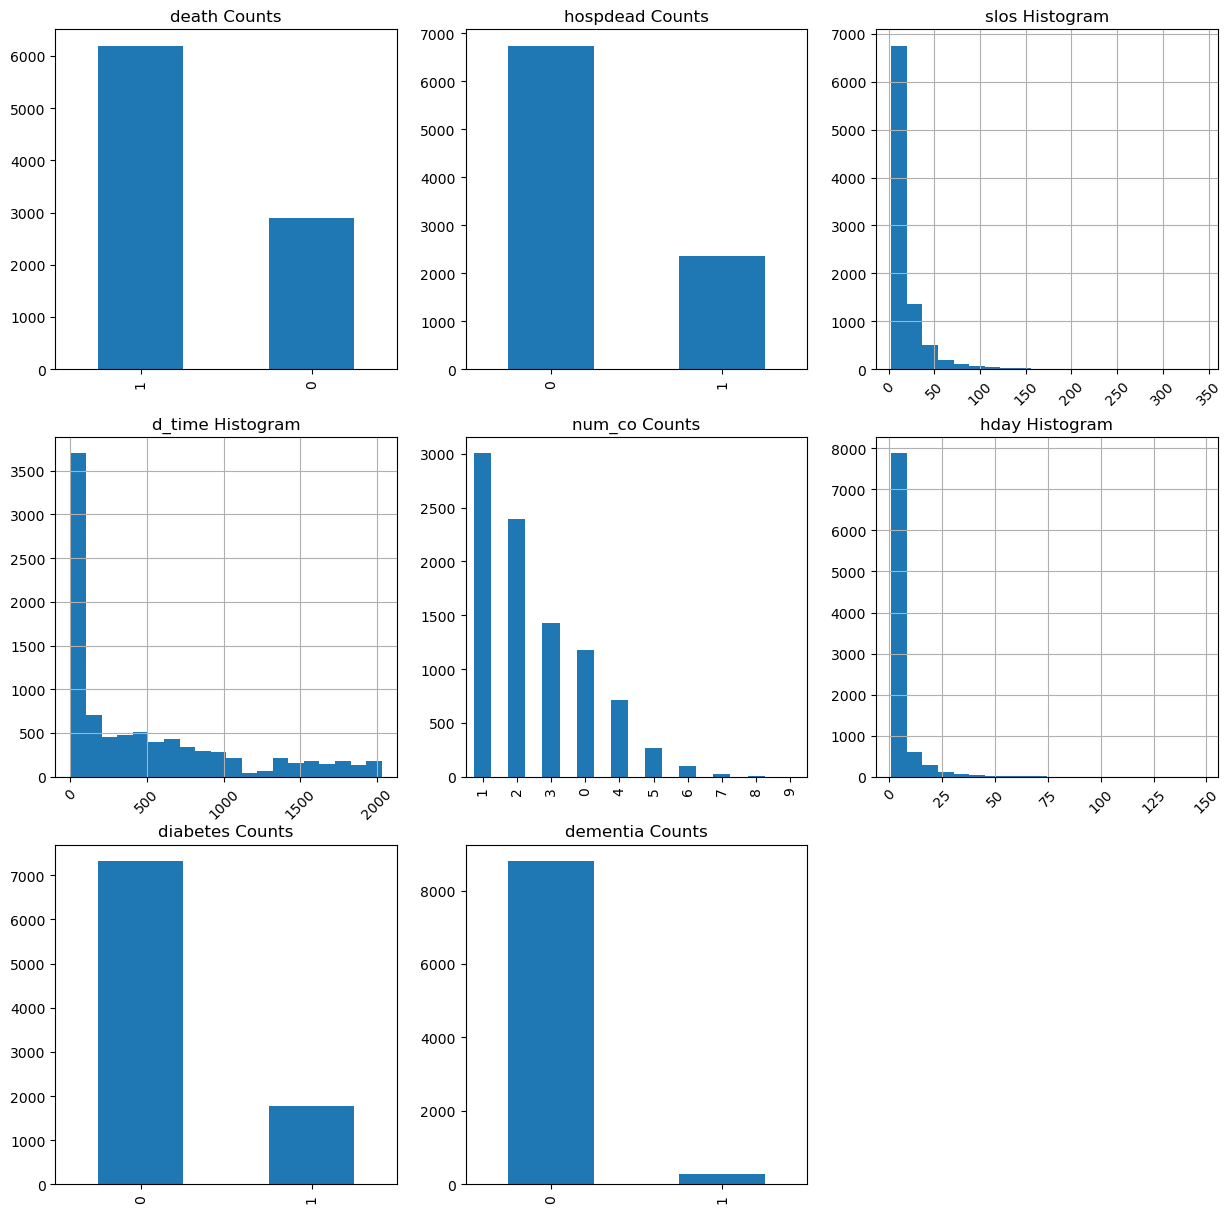

In [ ]:
plot_varibles(df=data, vars_to_plot=int_columns, cts_vars=int_cts_columns,
              num_cols=3, hist_num_bins=20)

In [ ]:
cols = list(data.columns)
categorical_features = data.select_dtypes(include='category').columns.tolist()
numerical_features = list(set(cols) - set(categorical_features) - set(int_columns))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


<Axes: xlabel='Num_missed_values'>

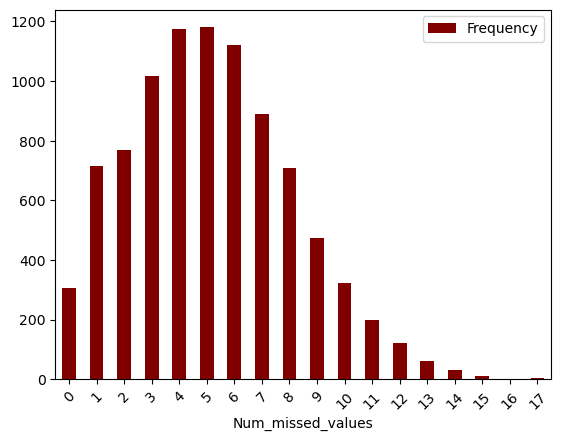

In [ ]:
def count_rows_with_missing_values(dataframe):
    missing_values_per_row = data.isnull().sum(axis=1)
    _bins = np.arange(int(min(missing_values_per_row)), int(max(missing_values_per_row)) + 1)
    hist_values, bins = np.histogram(missing_values_per_row, bins=_bins)
    bins_percent = [_ for _ in bins]
    hist_df = pd.DataFrame({'Num_missed_values': bins_percent[:-1], 'Frequency': hist_values})
    return hist_df
result = count_rows_with_missing_values(data)
result.plot.bar(x='Num_missed_values', y='Frequency', rot=45, width=0.5, color='maroon')

In [ ]:
# num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
#                                ("attribs_embedder", AppendRatioVariables(hash_indexes)),
#                                ("std_scaler", StandardScaler())
#                               ]
#                        )


num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                               ("std_scaler", StandardScaler())
                              ]
                       )
cat_pipeline = Pipeline(steps=[("cat_imputer", SimpleImputer(strategy="most_frequent")),
                               ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse=False))
                              ]
                       )

int_pipeline = Pipeline(steps=[("int_imputer", SimpleImputer(strategy="most_frequent"))]
                       )

data_processor_pipeline = ColumnTransformer([("num", num_pipeline, numerical_features),
                                             ("int_cts", num_pipeline, int_cts_columns),
                                             ("int_cat", num_pipeline, int_columns),
                                             ("cat", cat_pipeline, categorical_features)
                                            ]
                                           )
_df = data_processor_pipeline.fit_transform(data)
attribs = list(data_processor_pipeline.get_feature_names_out())
df = pd.DataFrame(_df, columns=attribs)
summarize_columns(df)

/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,num__surv2m,float64,0,0.0,949,-1.502889,-2.558454,0.625159
1,num__glucose,float64,0,0.0,439,-0.196340,-0.196340,-0.196340
2,num__avtisst,float64,0,0.0,352,-1.182669,0.487029,-0.727297
3,num__dnrday,float64,0,0.0,177,-0.480304,-0.279428,0.122324
4,num__pafi,float64,0,0.0,1294,1.606943,-1.450034,-0.041453
...,...,...,...,...,...,...,...,...
71,cat__sfdm2_<2 mo. follow-up,float64,0,0.0,2,1.000000,1.000000,1.000000
72,cat__sfdm2_Coma or Intub,float64,0,0.0,2,0.000000,0.000000,0.000000
73,cat__sfdm2_SIP>=30,float64,0,0.0,2,0.000000,0.000000,0.000000
74,cat__sfdm2_adl>=4 (>=5 if sur),float64,0,0.0,2,0.000000,0.000000,0.000000


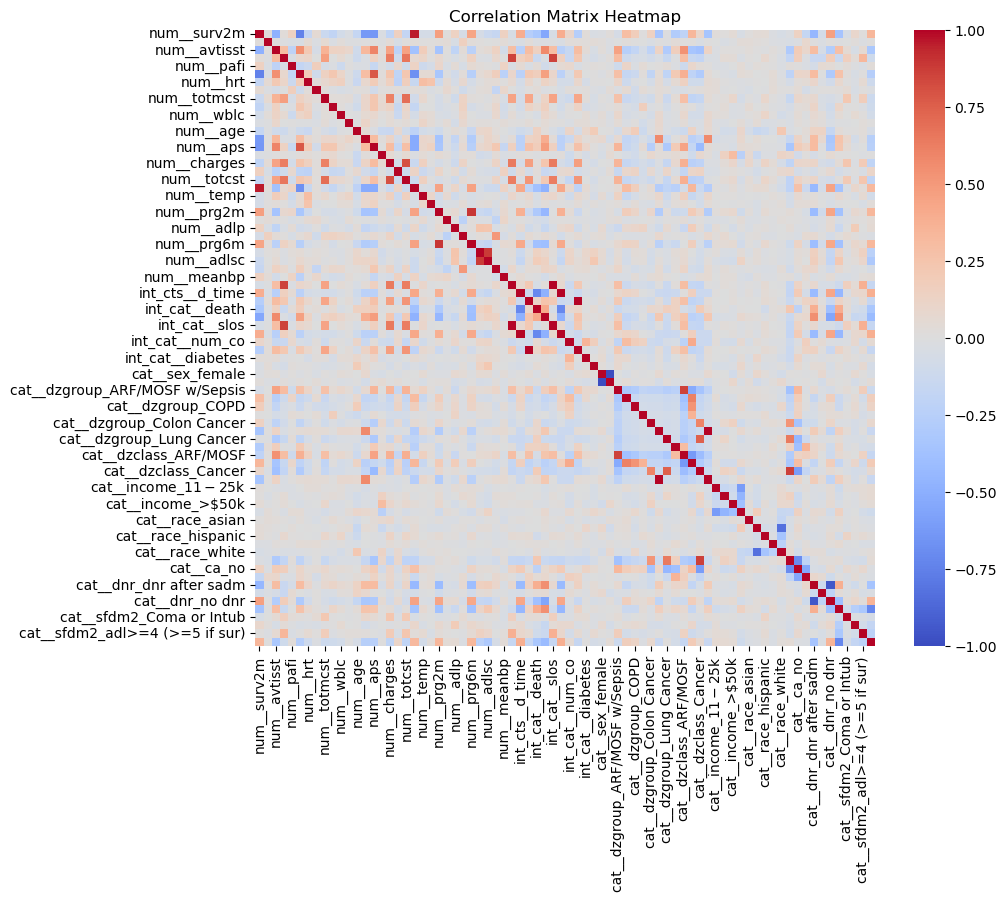

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
sample_train_df = train_df.sample(frac=0.2)
corr_matrix = sample_train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: >

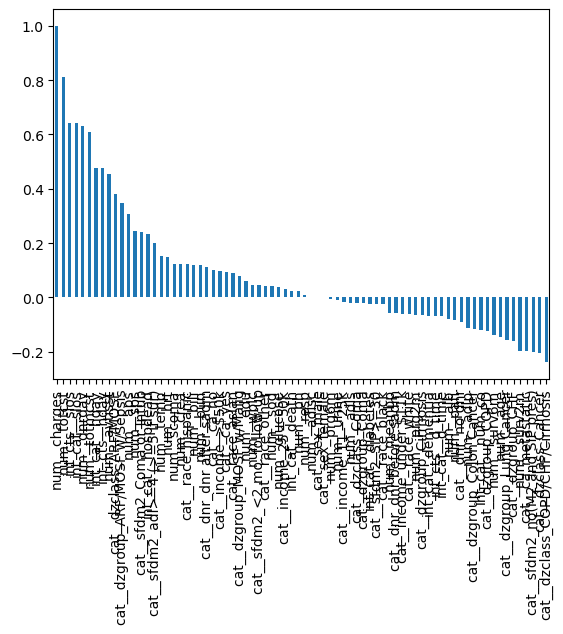

In [ ]:
corr_matrix["num__charges"].sort_values(ascending=False)
corr_matrix["num__charges"].sort_values(ascending=False).plot.bar()

In [ ]:
# train_df["rooms_per_household"] = train_df["total_rooms"]/train_df["households"]
# train_df["bedrooms_per_rooms"] = train_df["total_bedrooms"]/train_df["total_rooms"]
# train_df["population_per_household"] = train_df["population"]/train_df["households"]
# corr_matrix = train_df.sample(frac=0.1).corr()
# plt.figure(figsize=(5, 4))
# corr_matrix["median_house_value"].sort_values(ascending=False).plot(kind='barh')
# plt.title("Median House Value Corr")
# plt.xlabel('Correlation')
# plt.ylabel('Features')
# plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import MDS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def impute_with_random_forest(df, target_column, features_to_impute, random_state=None):
    """
    Impute missing values in a target column using a Random Forest model.

    Parameters:
    - df: DataFrame
        The input DataFrame containing the data.
    - target_column: str
        The column with missing values that you want to impute.
    - features_to_impute: list
        List of column names to be used as features for imputation.
    - random_state: int or None, optional (default=None)
        Random state for reproducibility.

    Returns:
    - df_imputed: DataFrame
        The DataFrame with missing values in the target column imputed.
    - proximity_matrix: DataFrame
        The proximity matrix of the Random Forest model.
    - mds_coordinates: DataFrame
        The coordinates of samples in the lower-dimensional space obtained through MDS.
    """

    # Split the data into two parts: rows with missing values and rows without missing values in the target column
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df.dropna(subset=[target_column])

    # Split the data into features and target for training
    X_train = df_not_missing[features_to_impute]
    y_train = df_not_missing[target_column]

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Compute the proximity matrix
    proximity_matrix = pd.DataFrame(rf_model.apply(X_train))

    # Use multidimensional scaling (MDS) to obtain coordinates in a lower-dimensional space
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state)
    mds_coordinates = pd.DataFrame(mds.fit_transform(1 / (proximity_matrix + 1e-6)), columns=['MDS1', 'MDS2'])

    # Plot the heatmap of the proximity matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(proximity_matrix, cmap='viridis', annot=False, cbar_kws={'label': 'Proximity'}, xticklabels=False, yticklabels=False)
    plt.title('Random Forest Proximity Matrix Heatmap')
    plt.show()

    # Plot the MDS visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='MDS1', y='MDS2', data=mds_coordinates, hue=mds_coordinates.index, palette='viridis', legend=False)
    plt.title('MDS Visualization of Proximity Matrix')
    plt.show()

    # Impute missing values in the target column using the trained model
    X_missing = df_missing[features_to_impute]
    imputed_values = rf_model.predict(X_missing)

    # Update the DataFrame with imputed values
    df_imputed = df.copy()
    df_imputed.loc[df[target_column].isnull(), target_column] = imputed_values

    return df_imputed, proximity_matrix, mds_coordinates

# Example usage:
# Assuming df is your DataFrame with missing values
df = pd.DataFrame({
    'feature1': [1, 2, 3, None, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target_column': [10, 20, 30, 40, None],
})

# Specify the target column and features to be used for imputation
target_column = 'target_column'
features_to_impute = ['feature1', 'feature2']

# Impute missing values using Random Forest and obtain MDS coordinates
df_imputed, proximity_matrix, mds_coordinates = impute_with_random_forest(df, target_column, features_to_impute, random_state=42)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values